In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('../../rusage.csv')
df_ = df
df.head()

,log_size,blocks,live_major_bytes
0,100,0,2184584
1,100,1000,6255512
2,100,2000,2957896
3,100,3000,4301952
4,100,4000,2952408


<AxesSubplot:xlabel='blocks', ylabel='live_major_bytes'>

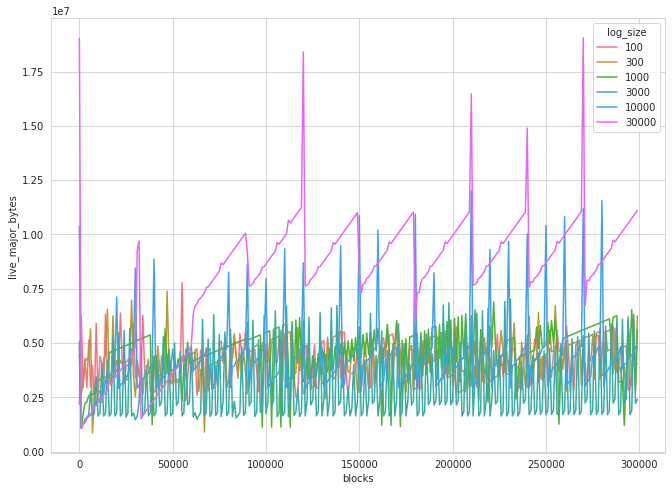

In [211]:
sns.set_style('whitegrid')

selected_log_sizes = [ 100, 300, 1000, 3000, 10000, 30000 ]
assert (set(selected_log_sizes).issubset(df['log_size']))


df_subset = df[df.log_size.isin(selected_log_sizes)]
palette = sns.color_palette('husl', n_colors=len(selected_log_sizes))

y = 'live_major_bytes'
hue = 'log_size'

fig, ax = plt.subplots(figsize=(11, 8))
sns.lineplot(ax = ax, data = df_subset, palette = palette, x = 'blocks', y = y, hue=hue)

<AxesSubplot:xlabel='log_size', ylabel='live_major_bytes'>

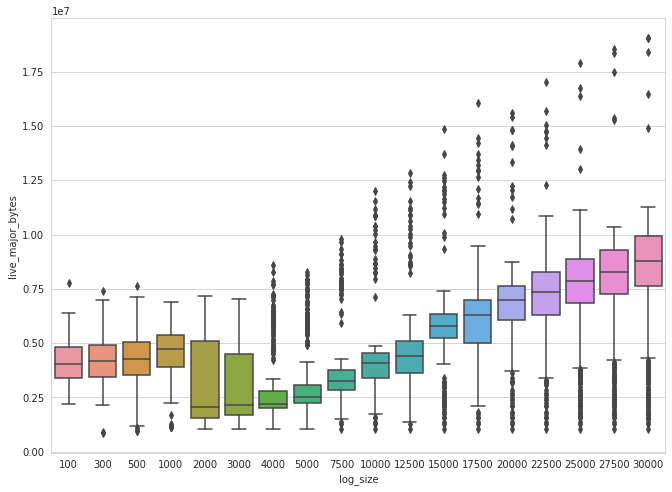

In [212]:
fig, ax = plt.subplots(figsize=(11, 8))
sns.boxplot(data = df, x = 'log_size', y = 'live_major_bytes')

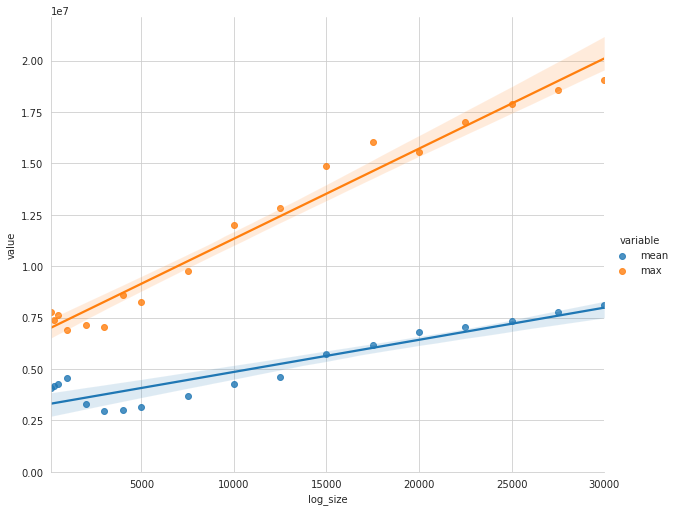

In [213]:
log_sizes = df['log_size'].unique()

df = df_
df = df.groupby('log_size').agg({'live_major_bytes':['mean', 'max']}).reset_index()

df.columns = df.columns.to_flat_index()
df['log_size'] = df[('log_size', '')]
df['mean'] = df[('live_major_bytes', 'mean')]
df['max'] = df[('live_major_bytes', 'max')]

df_melted = pd.melt(df, id_vars='log_size', value_vars=['mean', 'max'])

g = sns.lmplot(data = df_melted.reset_index(), x = 'log_size', hue='variable', y = 'value', height=7, aspect=1.2)
g.set(ylim=(0, None))

In [214]:
slope, intercept, r_value, _, _ = stats.linregress(x = df['log_size'], y = df['max'])

print("live_major_bytes(max)  = %.3g + %.3g * log_size  (r_value = %f)" % (intercept, slope, r_value))

slope, intercept, r_value, _, _ = stats.linregress(x = df['log_size'], y = df['mean'])
print("live_major_bytes(mean) = %.3g + %.3g * log_size  (r_value = %f)" % (intercept, slope, r_value))


live_major_bytes(max)  = 6.96e+06 + 438 * log_size  (r_value = 0.985772)
live_major_bytes(mean) = 3.3e+06 + 156 * log_size  (r_value = 0.925195)
